In [146]:
# Toggle on-off code text  
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

# Bounce Ball

A simple data visualization and analysis of the 2019 FIVB Volleyball Nations League data

<img src='resources/bounceball_images/haikyuu.jpg'/>

## 1. Executive Summary

Volleyball is a team sport involving different skillsets, in which mastery of a specific skill is most of the time expected from a particular position. For example, a middle blocker is expected to be better in the blocking department, same goes with the wing spiker in the attacking/scoring department, and setter for the setting department. Although every player is expected to be good in the receiving and digging deparment, it is the libero's job to master these two skills as he is the main player in charge of the team's floor defense.

Using the data acquired from the official *FIVB Volleyball Nations League* website, I tried to find out wich particular skills contribute to team winnings that eventually land them to the top spot.  The analysis shows that excelling in all of the skill departments i essential; but putting emphasis on the **digging**, **setting**, and **attacking** departments is what helps the number 1 team achieved their goal.

## 2. Introduction

I believe almost all of us know what volleyball is. It is one of the most popular sports in the world, [ranking no. 6](https://sportsshow.net/top-10-most-popular-sports-in-the-world/), with an estimate of 900 million fans. It is a team sport in which 2 teams comprising of 6 players are trying to _"kill"_ the ball to get a point. For those who are not familiar with the sport, [Wikipedia](https://en.wikipedia.org/wiki/Volleyball) has done a good job explaining the history, basic rules, and positions, but I suggest you to watch some games in [Youtube](https://www.youtube.com/watch?v=x_CTo5S3wzs). Volleyball is an exciting sport \(*I swear*).

I wanted to know how the team composition and players' strengths contribute to the team's winnings and overall ranking.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Dataset

The dataset used for this study is the players' statistics data from the [2019 FIVB Volleyball Nations League (Men's Division)](https://www.volleyball.world/en/vnl/men/statistics). The data extracted from the website (*when I said "extracted" I meant copy-pasting to excel because I still don't know how to do web scraping when I did this one*) includes 7 sheets, ranking the players for each skill department (*attack, block,serve, receive, dig, set*) and scoring (*combination of attack, block, and serve*) for the preliminary round of the competition. For this EDA, I have chosen to select only the __top 50__ out of the hundreds of players from each department.

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# This returns dictionary of DataFrames
# read the file
vnl_dict = pd.read_excel('VNL-Statistics.xlsx', sheet_name=None)

# List all the sheet names and the shape of each DataFrames
print("Excel Sheets: -- (rows, columns)")
for count, sheet in enumerate(vnl_dict.items()):
    print(count+1, sheet[0], '--', sheet[1].shape)

Excel Sheets: -- (rows, columns)
1 Best Scorers -- (255, 8)
2 Best Attackers -- (252, 9)
3 Best Blockers -- (255, 9)
4 Best Server -- (259, 9)
5 Best Setters -- (286, 9)
6 Best Diggers -- (292, 9)
7 Best Receivers -- (245, 9)


We can see that the excel file has 7 sheets listing the top players for each skill department. The datasets also have different number of rows and columns. As mentioned ealier, we are only going to use the top 50 for each skill department. Let's create another `dictionary` of `DataFrames` to store the top 50 players.

In [3]:
vnl_50 = {}

# get the top 50 for each
for key, val in vnl_dict.items():
    vnl_50[key] = val.iloc[0:50, :]

# print sheet names and shape for each DataFrame
print("Excel Sheets: -- (rows, columns)")
for count, sheet in enumerate(vnl_50.items()):
    print(count+1, sheet[0], '--', sheet[1].shape)

Excel Sheets: -- (rows, columns)
1 Best Scorers -- (50, 8)
2 Best Attackers -- (50, 9)
3 Best Blockers -- (50, 9)
4 Best Server -- (50, 9)
5 Best Setters -- (50, 9)
6 Best Diggers -- (50, 9)
7 Best Receivers -- (50, 9)


Now let's see the first 5 lines of each of these dataset to have an overview of the data.

In [4]:
# display first 5 lines for each DataFrames
for key, val in vnl_50.items():
    print(key)
    display(val.head())

Best Scorers


,RANK,SHIRTNUMBER,NAME,TEAM,ATTACKS,BLOCKS,SERVES,TOTAL
0,1,10,Amir Ghafour,IRI,214,21,14,249
1,2,11,Yuji Nishida,JPN,183,13,23,219
2,3,18,Ricardo Lucarelli Souza,BRA,173,14,23,210
3,4,13,Simon Hirsch,GER,170,21,13,204
4,5,9,Yoandy Leal Hidalgo,BRA,161,22,19,202


Best Attackers


,RANK,SHIRTNUMBER,NAME,TEAM,SPIKES,FAULTS,SHOTS,TOTAL ATTEMPTS,SUCCESS %
0,1,12,Bruno Lima,ARG,177,50,98,325,54.46
1,2,10,Amir Ghafour,IRI,214,59,120,393,54.45
2,3,18,Ricardo Lucarelli Souza,BRA,173,54,91,318,54.40
3,4,10,Sharone Vernon-Evans,CAN,130,32,82,244,53.28
4,5,14,Yuki Ishikawa,JPN,170,40,112,322,52.80


Best Blockers


,RANK,SHIRTNUMBER,NAME,TEAM,STUFF BLOCKS,FAULTS,REBOUNDS,TOTAL ATTEMPTS,AVERAGE PER SET
0,1,17,Graham Vigrass,CAN,31,63,65,159,0.53
1,2,6,Seyed Mohammad Mousavi Eraghi,IRI,32,79,56,167,0.52
2,3,20,Ilyas Kurkaev,RUS,33,81,73,187,0.49
3,4,5,Svetoslav Gotsev,BUL,28,55,48,131,0.47
4,5,9,Ivan Iakovlev,RUS,32,68,48,148,0.47


Best Server


,RANK,SHIRTNUMBER,NAME,TEAM,ACES,FAULTS,HITS,TOTAL ATTEMPTS,AVERAGE PER SET
0,1,18,Egor Kliuka,RUS,28,37,107,172,0.41
1,2,11,Yuji Nishida,JPN,23,41,124,188,0.39
2,3,18,Ricardo Lucarelli Souza,BRA,23,33,175,231,0.30
3,4,2,Arshdeep Dosanjh,AUS,17,29,130,176,0.30
4,5,6,Simone Giannelli,ITA,16,21,110,147,0.29


Best Setters


,RANK,SHIRTNUMBER,NAME,TEAM,RUNNING SETS,FAULTS,STILL SETS,TOTAL ATTEMPTS,AVERAGE PER SET
0,1,4,Mir Saeid Marouflakrani,IRI,529,17,688,1234,8.53
1,2,21,Brett James Walsh,CAN,443,13,758,1214,7.64
2,3,6,Simone Giannelli,ITA,358,4,458,820,6.39
3,4,2,Arshdeep Dosanjh,AUS,308,10,677,995,5.40
4,5,17,Jan Zimmermann,GER,336,6,699,1041,5.25


Best Diggers


,RANK,SHIRTNUMBER,NAME,TEAM,DIGS,FAULTS,RECEPTIONS,TOTAL ATTEMPTS,AVERAGE PER SET
0,1,9,Santiago Danani,ARG,143,57,45,245,2.42
1,2,11,Fabio Balaso,ITA,121,35,41,197,2.16
2,3,11,Luke Perry,AUS,122,46,44,212,2.14
3,4,10,Julian Zenger,GER,126,41,61,228,1.97
4,5,2,Jenia Grebennikov,FRA,118,27,39,184,1.87


Best Receivers


,RANK,SHIRTNUMBER,NAME,TEAM,EXCELLENTS,FAULTS,SERVE RECEPTIONS,TOTAL ATTEMPTS,EFFICIENCY %
0,1,4,Thales Hoss,BRA,104,23,231,358,22.63
1,2,6,Alexandre Ferreira,POR,75,17,195,287,20.21
2,3,9,Santiago Danani,ARG,89,23,229,341,19.35
3,4,18,Garrett Muagututia,USA,74,15,228,317,18.61
4,5,10,Julian Zenger,GER,73,19,222,314,17.20


We can see  that for each skill department, there are different features/canolumns used. The constant features for all the datasets are the `RANK`, `SHIRTNUMBER`, `NAME`, and `TEAM`.

### 3.2 NULL Values

In [5]:
# Check for null values in all columns for all DataFrames
for key,val in vnl_50.items():  
    null_per_df = val.isnull().sum()
    
    # get only columns with NULL values
    true_nulls = null_per_df[null_per_df != 0]
    
    if len(true_nulls):
        print(f'DataFrame: {key}')
        display(true_nulls)

DataFrame: Best Attackers


SUCCESS %    22
dtype: int64

DataFrame: Best Receivers


EFFICIENCY %    20
dtype: int64

In [7]:
# display rows with missing values
print("Best Attackers NULL")
attackers = vnl_50['Best Attackers']
display(attackers[attackers['SUCCESS %'].isnull()])

print("Best Receivers NULL")
attackers = vnl_50['Best Receivers']
display(attackers[attackers['EFFICIENCY %'].isnull()])

Best Attackers NULL


,RANK,SHIRTNUMBER,NAME,TEAM,SPIKES,FAULTS,SHOTS,TOTAL ATTEMPTS,SUCCESS %
28,29,2,Federico Pereyra,ARG,79,27,51,157,NaN
29,30,3,Jan Martinez Franchi,ARG,38,12,35,85,NaN
30,31,4,Maximiliano Cavanna,ARG,2,0,1,3,NaN
31,32,5,Nicolas Uriarte,ARG,8,1,12,21,NaN
32,33,6,Cristian Poglajen,ARG,59,23,60,142,NaN
33,34,8,Agustin Loser,ARG,50,9,38,97,NaN
34,35,11,Sebastian Solé,ARG,53,9,31,93,NaN
35,36,13,Ezequiel Palacios,ARG,93,24,81,198,NaN
36,37,14,Pablo Crer,ARG,34,7,22,63,NaN
37,38,15,Luciano De Cecco,ARG,7,5,7,19,NaN


Best Receivers NULL


,RANK,SHIRTNUMBER,NAME,TEAM,EXCELLENTS,FAULTS,SERVE RECEPTIONS,TOTAL ATTEMPTS,EFFICIENCY %
30,31,2,Federico Pereyra,ARG,0,0,2,2,NaN
31,32,3,Jan Martinez Franchi,ARG,15,2,48,65,NaN
32,33,5,Nicolas Uriarte,ARG,0,0,1,1,NaN
33,34,6,Cristian Poglajen,ARG,24,9,131,164,NaN
34,35,8,Agustin Loser,ARG,2,0,2,4,NaN
35,36,11,Sebastian Solé,ARG,3,0,8,11,NaN
36,37,13,Ezequiel Palacios,ARG,24,7,122,153,NaN
37,38,14,Pablo Crer,ARG,0,0,2,2,NaN
38,39,15,Luciano De Cecco,ARG,0,0,1,1,NaN
39,40,17,Nicolas Mendez,ARG,21,3,54,78,NaN


There are 2 DataFrames contaning 1 column each that have NULL values. For the `Best Attackers`, missing values for `SUCCESS %` column started from row 28 all the way to the end. `Best Receivers` on the other hand has missing values for the `EFFICIENCY %` column starting from row 30 onwards.

On the next section, we will try to compute and fill-out these missing values before doing the visualizationa and analysis.

## 4. Data Preprocessing

To compute for the missing values, below are the formula needed based on the [FIVB](http://www.fivb.org/en/volleyball/VIS.asp) website.

__Attacking Success %__

$$
\frac{Spikes}{Total\ Attempts} (100)
$$

__Receiving Efficiency %__

$$
\frac{Excellents-Faults}{Total\ Attempts} (100)
$$

In [8]:
# computing for Attacking Success % on the Best Attackers DataFrame
attackers = vnl_50['Best Attackers'].copy()
attackers['SUCCESS %'] = attackers['SUCCESS %']\
                .fillna((attackers['SPIKES']/attackers['TOTAL ATTEMPTS'])*100)

# computing for Receiving Efficiency % on the Best Receivers DataFrame
receivers = vnl_50['Best Receivers'].copy()
receivers['EFFICIENCY %'] = receivers['EFFICIENCY %']\
                .fillna(((receivers['EXCELLENTS']-receivers['FAULTS'])
                         /receivers['TOTAL ATTEMPTS'])*100)

# assign computed values
vnl_50['Best Attackers']['SUCCESS %'] = attackers['SUCCESS %']
vnl_50['Best Receivers']['EFFICIENCY %'] = receivers['EFFICIENCY %']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's verify the computed data.

In [9]:
print('Best Attackers')
display(vnl_50['Best Attackers'])

print('Best Receivers')
display(vnl_50['Best Receivers'])

Best Attackers


,RANK,SHIRTNUMBER,NAME,TEAM,SPIKES,FAULTS,SHOTS,TOTAL ATTEMPTS,SUCCESS %
0,1,12,Bruno Lima,ARG,177,50,98,325,54.460000
1,2,10,Amir Ghafour,IRI,214,59,120,393,54.450000
2,3,18,Ricardo Lucarelli Souza,BRA,173,54,91,318,54.400000
3,4,10,Sharone Vernon-Evans,CAN,130,32,82,244,53.280000
4,5,14,Yuki Ishikawa,JPN,170,40,112,322,52.800000
5,6,15,Victor Poletaev,RUS,158,51,94,303,52.150000
6,7,20,Gabriele Nelli,ITA,135,36,88,259,52.120000
7,8,19,Tsvetan Sokolov,BUL,141,53,77,271,52.030000
8,9,9,Yoandy Leal Hidalgo,BRA,161,58,99,318,50.630000
9,10,11,Yuji Nishida,JPN,183,69,114,366,50.000000


Best Receivers


,RANK,SHIRTNUMBER,NAME,TEAM,EXCELLENTS,FAULTS,SERVE RECEPTIONS,TOTAL ATTEMPTS,EFFICIENCY %
0,1,4,Thales Hoss,BRA,104,23,231,358,22.630000
1,2,6,Alexandre Ferreira,POR,75,17,195,287,20.210000
2,3,9,Santiago Danani,ARG,89,23,229,341,19.350000
3,4,18,Garrett Muagututia,USA,74,15,228,317,18.610000
4,5,10,Julian Zenger,GER,73,19,222,314,17.200000
5,6,3,Ruben Schott,GER,61,13,208,282,17.020000
6,7,11,Luke Perry,AUS,59,22,148,229,16.160000
7,8,5,Tatsuya Fukuzawa,JPN,50,14,160,224,16.070000
8,9,7,Purya Fayazi D.,IRI,53,10,228,291,14.780000
9,10,12,Lourenco Martins,POR,48,17,153,218,14.220000


If you look at the `Best Attackers` DataFrame, `SUCCESS %` is sorted in descending order starting from row 0 up until row 27, clearly defining the ranking of the players. However starting from row 28, the value for this column is not anymore properly sorted. Same can be obserted in `Best Receivers`' `EFFICIENCY %` column on rows 30 onwards.

This tells us that at least for the `Best Attackers` and `Best Receivers` rankings, there are other conditions and metrics considered aside from  the  `SUCCESS %` and `EFFICIENCY %`. I may need to do further checking on this.

## 5. Data Visualization

On this section we will now visualize the data and try to see if we can get some valuable insights from this.

### 5.1 Count per Team/Country

Let's see what teams are dominating each skill department by counting the number of players grouped by their respective teams. For easeier analysis, let's just focus on the top 10 teams per skill department.

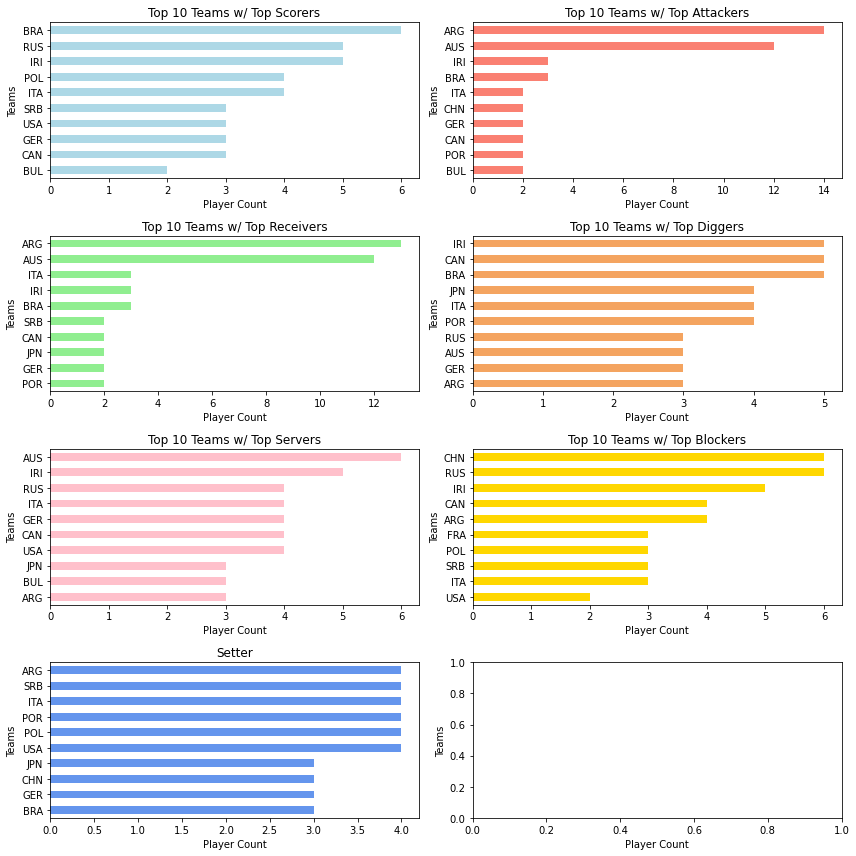

In [10]:
# count players per country; output is already sorted in descending value order
sc =  vnl_50['Best Scorers']['TEAM'].value_counts()
at =  vnl_50['Best Attackers']['TEAM'].value_counts()
sr =  vnl_50['Best Server']['TEAM'].value_counts()
bl =  vnl_50['Best Blockers']['TEAM'].value_counts()
rc =  vnl_50['Best Receivers']['TEAM'].value_counts()
dg =  vnl_50['Best Diggers']['TEAM'].value_counts()
st =  vnl_50['Best Setters']['TEAM'].value_counts()

# setting a 4x2 plot grid
fig, ax  = plt.subplots(4, 2, figsize=(12,12))
ax[0][0].set_title('Top 10 Teams w/ Top Scorers')
ax[0][1].set_title('Top 10 Teams w/ Top Attackers')
ax[1][0].set_title('Top 10 Teams w/ Top Receivers')
ax[1][1].set_title('Top 10 Teams w/ Top Diggers')
ax[2][0].set_title('Top 10 Teams w/ Top Servers')
ax[2][1].set_title('Top 10 Teams w/ Top Blockers')
ax[3][0].set_title('Setter')

# set x and y labels
for x in range(4):
    for y in range(2):
        ax[x][y].set_xlabel('Player Count')
        ax[x][y].set_ylabel('Teams')

# generate horizontal bar graph
sc.head(10).sort_values().plot(kind='barh', ax = ax[0][0], color='lightblue')
at.head(10).sort_values().plot(kind='barh', ax = ax[0][1], color='salmon')
rc.head(10).sort_values().plot(kind='barh', ax = ax[1][0], color='lightgreen')
dg.head(10).sort_values().plot(kind='barh', ax = ax[1][1], color='sandybrown')
sr.head(10).sort_values().plot(kind='barh', ax = ax[2][0], color='pink')
bl.head(10).sort_values().plot(kind='barh', ax = ax[2][1], color='gold')
st.head(10).sort_values().plot(kind='barh', ax = ax[3][0], color='cornflowerblue')

plt.tight_layout() 
plt.show()

It seems like there are no particular team dominiating all the skill departments. Even if we narrow our scope to top 3,  no pattern can be derived as it keeps on changing. Although, we can also observe that **Iran**(IRI) often appears in the top 3 (*Best Scorers, Diggers, Servers, Blockers*)  more frequently than any other teams.

Does this mean Iran is occupying the top seed for the preliminary round? Let us confirm this in the next section.

### 5.2 Top 5 Teams (Preliminary Round)

The result of FIVB VNL Preliminary Round (VNL 2019) Men's Division can be found [here](https://www.volleyball.world/en/vnl/2019/men/resultsandranking/round1). Below is the screenshot of the top 5 teams for this round.

<img src='resources/bounceball_images/top5.png' width='250' height='300'/>

Our earlier assumption was wrong. *Iran* is not the top team for this round, but instead it's *Brazil*. To better understand why, let's get these top 5 teams and try to compare them side by side.

In [11]:
"""
Below codes are necessary steps to properly get the values for the top 5 teams
because I keep on getting the error:

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no 
longer supported
"""

# create list of department counts for iteration
skills = [sc, at, sr, bl, rc, dg, st]

# storage for the top 5 teams per skill dept; 0 as temporary value
skill_dept = {'sc': 0, 'at': 0, 'sr': 0, 'bl': 0, 'rc': 0, 'dg': 0, 'st': 0}

# dict of top 5 teams and their rankings
top5 = {'BRA': 1, 'IRI': 2, 'RUS': 3, 'FRA': 4, 'POL': 5}

for idx, skill in enumerate(skill_dept):
    df_top5 = pd.DataFrame.from_dict(top5, orient='index', columns=['rank'])
    
    # check if all top 5 teams have players in the top 50 per skill dept
    teams = set(top5.keys()).intersection(skills[idx].index)
    
    df_top5['count'] = skills[idx][teams]
    df_top5['count'] = df_top5['count'].fillna(0).astype(int)
    skill_dept[skill] = df_top5

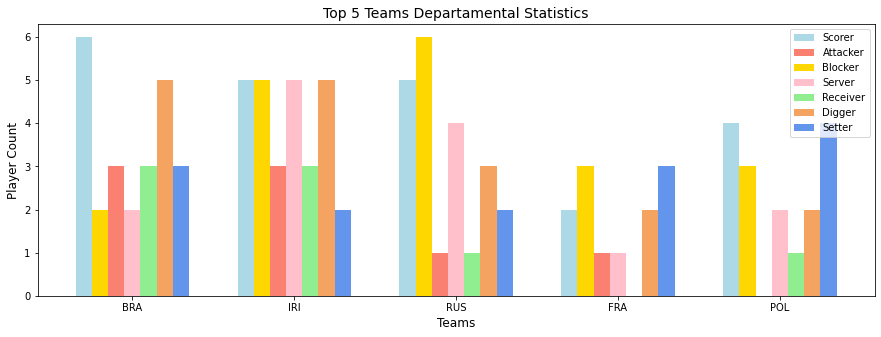

In [12]:
# graph each skill dept by team
fig, ax = plt.subplots(1, figsize=(15, 5))


pos = range(5)
width = 0.10

ax.bar(top5.keys(), skill_dept['sc']['count'], width, label='Scorer', color='lightblue')

ax.bar([p + width*2 for p in pos], skill_dept['at']['count'], width, 
       label='Attacker', color='salmon')
ax.bar([p + width for p in pos], skill_dept['bl']['count'], width, 
       label='Blocker', color='gold')
ax.bar([p + width*3 for p in pos], skill_dept['sr']['count'], width, 
       label='Server', color='pink')
ax.bar([p + width*4 for p in pos], skill_dept['rc']['count'], width,
       label='Receiver', color='lightgreen')
ax.bar([p + width*5 for p in pos], skill_dept['dg']['count'], width, 
       label='Digger', color='sandybrown')
ax.bar([p + width*6 for p in pos], skill_dept['st']['count'], width, 
       label='Setter', color='cornflowerblue')

ax.legend(loc='best')

ax.set_title('Top 5 Teams Departamental Statistics', fontsize=14)
ax.set_xlabel('Teams', fontsize=12)
ax.set_ylabel('Player Count', fontsize=12)

ax.set_xticks([p + 3*width for p in pos])
plt.show()

Based from this graph we can observe the following:
1. **Russia** has better blocking players, probably one of the reasons why they are in the top 3; however, **Brazil** and **Iran** have better attackers and are also also not far behind when it comes to blocking (Iran to be specific).
2. **Iran** is the most balanced team skill-wise, having a lot of top players in the *scoring, blocking, serving,* and *digging* department.
3. **Brazil** has better setters, which most probably contributes to its high scoring players. Also remember that Top Scorer ranking is the aggregated data from all the scoring departments (i.e., *attack, block,* and *serve*)

We have to remember that we are just basing our and analysis on the count of players included in the top 50 for each skill department. We are not yet looking into the aggregated efficiency rate and total points scored by the players. This could be the reason why Brazil, despite lagging behind in some departments like blocking and serving, still managed to be the top team when it comes to scoring and at the same time, getting the top seed. There may be few players in the top 50 but they might be the ones who are in the higher seeds.

### 5.3 Top Scoring Players

Knowing that *Brazil, Iran, Russia, France,* and *Poland* are the top teams for this round, let's check if this also reflects the ranking for the top scorers in the league.

In [13]:
vnl_50['Best Scorers'].head(10)

,RANK,SHIRTNUMBER,NAME,TEAM,ATTACKS,BLOCKS,SERVES,TOTAL
0,1,10,Amir Ghafour,IRI,214,21,14,249
1,2,11,Yuji Nishida,JPN,183,13,23,219
2,3,18,Ricardo Lucarelli Souza,BRA,173,14,23,210
3,4,13,Simon Hirsch,GER,170,21,13,204
4,5,9,Yoandy Leal Hidalgo,BRA,161,22,19,202
5,6,12,Bruno Lima,ARG,177,16,6,199
6,7,15,Victor Poletaev,RUS,158,20,16,194
7,8,14,Yuki Ishikawa,JPN,170,12,11,193
8,9,18,Lincoln Alexander Williams,AUS,156,10,12,178
9,10,2,Chuan Jiang,CHN,152,19,6,177


Based from the table, although *Nishida (Japan)* and *Hirsch (Germany)* are two of the top 5 scorers of the league, their respective teams
did not make it to the same rank bracket. It simply says volleyball is not a one-man team that even if you have the top scorer of the league, it doesn't guarantee a championship, or at least the top rankings.

## 6. Conclusion

Volleyball is a team sport with different skills distributed among each member of the team. Both the team and the skills win the game. Particularly, having high performing *diggers, setters,* and and *attackers/spikers* would yield the most desirable outcome since these three positions represents the three major touch points of the ball before it goes to the other side.

## Notes

A better and more accurate analysis can be derived if we can work on the actual numbers (e.g., attack points, faults, efficiency rate, success rate, etc.) aside from the ranking and the count of players alone. This is actually meant for my data visualization class (see Exhibit A), but I know I didn't also do well in the visualization part (*apologies for that*). I will try to work further on this if time permits, hopefully with udpated data since VNL 2019 is already done. *SPOILER ALERT: Russia won!*.

## Exhibits

### Exhibit A

Data visualization and storytelling final output.

<img src='resources/bounceball_images/p1.png'/>
<img src='resources/bounceball_images/p2.png'/>
<img src='resources/bounceball_images/p3.png'/>
<img src='resources/bounceball_images/p4.png'/>
<img src='resources/bounceball_images/p5.png'/>